In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label')
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [11]:
import utils.network.network3 as model
from utils.metrics import metric

In [12]:
net = model.MyLstmModel()

In [13]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.89, epsilon=1e-07, centered=False, name='RMSprop')
net.compile(optimizer=algorithm, loss='categorical_crossentropy', metrics=metric())

In [14]:
from tensorflow.keras import callbacks
import datetime
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network3-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(opt_.exp_decay)

In [15]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback], verbose=1) # lrate

_acc: 0.0000e+00 - val_tp: 141982.0000 - val_fp: 3463.0000 - val_tn: 286929.0000 - val_fn: 3214.0000 - val_categorical_accuracy: 0.9772 - val_categorical_crossentropy: 0.0565 - val_precision: 0.9762 - val_recall: 0.9779 - val_auc: 0.9936
Epoch 5/40
662/662 [==============================] - 47s 71ms/step - loss: 0.0719 - acc: 0.0000e+00 - tp: 328258.0000 - fp: 8878.0000 - tn: 668698.0000 - fn: 10530.0000 - categorical_accuracy: 0.9721 - categorical_crossentropy: 0.0697 - precision: 0.9737 - recall: 0.9689 - auc: 0.9949 - val_loss: 0.0565 - val_acc: 0.0000e+00 - val_tp: 141869.0000 - val_fp: 3281.0000 - val_tn: 287111.0000 - val_fn: 3327.0000 - val_categorical_accuracy: 0.9769 - val_categorical_crossentropy: 0.0541 - val_precision: 0.9774 - val_recall: 0.9771 - val_auc: 0.9968
Epoch 6/40
662/662 [==============================] - 48s 73ms/step - loss: 0.0702 - acc: 0.0000e+00 - tp: 328426.0000 - fp: 8359.0000 - tn: 669217.0000 - fn: 10362.0000 - categorical_accuracy: 0.9731 - categorica

In [16]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)


TrueNegatives result:  128550.0
TruePositives result:  72411.0
FalseNegatives result:  3084.0
FalsePositives result:  3377.0
Recall result:  0.9591496
Precision result:  0.9554415


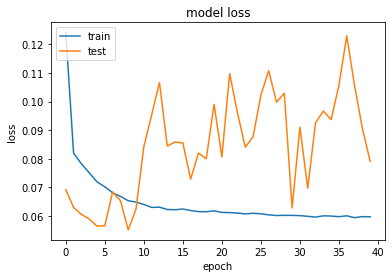

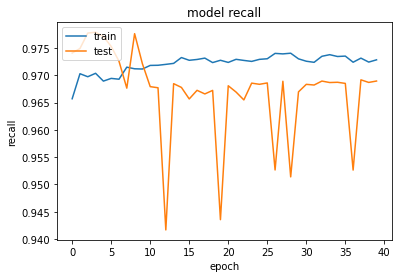

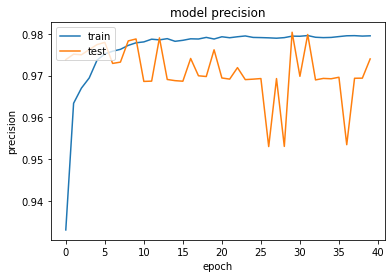

In [17]:
import utils.graph as fig
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)